In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score

In [2]:
ev_df = pd.read_csv('EV_India.csv')

In [3]:
ev_df.head()

,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,1,Andaman & Nicobar Island,162,"1,46,945","1,47,107"
1,2,Andra Pradesh,NaN,NaN,NaN
2,3,Arunachal Pradesh,20,"2,52,965","2,52,985"
3,4,Assam,64766,"46,77,053","47,41,819"
4,5,Bihar,83335,"1,04,07,078","1,04,90,413"


In [4]:
ev_df.shape

(36, 5)

In [5]:
ev_df.isnull().sum()/len(ev_df)*100

Sr. No.                        0.000000
State Name                     0.000000
Total Electric Vehicle        11.111111
Total Non-Electric Vehicle    11.111111
Total                         11.111111
dtype: float64

In [6]:
ev_df.dtypes

Sr. No.                        int64
State Name                    object
Total Electric Vehicle        object
Total Non-Electric Vehicle    object
Total                         object
dtype: object

In [7]:
ev_df.describe(include="all")

,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
count,36.000000,36,32,32,32
unique,NaN,36,31,32,32
top,NaN,Andaman & Nicobar Island,21,"1,46,945","1,47,107"
freq,NaN,1,2,1,1
mean,18.500000,NaN,NaN,NaN,NaN
std,10.535654,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN
25%,9.750000,NaN,NaN,NaN,NaN
50%,18.500000,NaN,NaN,NaN,NaN
75%,27.250000,NaN,NaN,NaN,NaN


In [8]:
ev_df['Total Non-Electric Vehicle'] = ev_df['Total Non-Electric Vehicle'].str.replace(',', '')

In [9]:
ev_df.head()

,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,1,Andaman & Nicobar Island,162,146945,"1,47,107"
1,2,Andra Pradesh,NaN,NaN,NaN
2,3,Arunachal Pradesh,20,252965,"2,52,985"
3,4,Assam,64766,4677053,"47,41,819"
4,5,Bihar,83335,10407078,"1,04,90,413"


In [10]:
ev_df['Total Electric Vehicle'] = ev_df['Total Electric Vehicle'].str.replace(',', '')

In [11]:
ev_df.head()

,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,1,Andaman & Nicobar Island,162,146945,"1,47,107"
1,2,Andra Pradesh,NaN,NaN,NaN
2,3,Arunachal Pradesh,20,252965,"2,52,985"
3,4,Assam,64766,4677053,"47,41,819"
4,5,Bihar,83335,10407078,"1,04,90,413"


In [12]:
ev_df['Total Electric Vehicle']=ev_df['Total Electric Vehicle'].astype('float64')
ev_df['Total Non-Electric Vehicle']=ev_df['Total Non-Electric Vehicle'].astype('float64')

In [13]:
med_tot = ev_df['Total Electric Vehicle'].median()
med_tot_non = ev_df['Total Non-Electric Vehicle'].median()

In [14]:
ev_df['Total Electric Vehicle'] = ev_df['Total Electric Vehicle'].fillna(med_tot)
ev_df['Total Non-Electric Vehicle'] = ev_df['Total Non-Electric Vehicle'].fillna(med_tot_non)

In [15]:
ev_df.drop('Total', axis=1, inplace=True)

In [16]:
ev_df.head()

,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle
0,1,Andaman & Nicobar Island,162.0,146945.0
1,2,Andra Pradesh,15807.5,3994547.0
2,3,Arunachal Pradesh,20.0,252965.0
3,4,Assam,64766.0,4677053.0
4,5,Bihar,83335.0,10407078.0


In [17]:
ev_df['Total'] = ev_df['Total Electric Vehicle'] + ev_df['Total Non-Electric Vehicle']

In [18]:
ev_df.head()

,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,1,Andaman & Nicobar Island,162.0,146945.0,147107.0
1,2,Andra Pradesh,15807.5,3994547.0,4010354.5
2,3,Arunachal Pradesh,20.0,252965.0,252985.0
3,4,Assam,64766.0,4677053.0,4741819.0
4,5,Bihar,83335.0,10407078.0,10490413.0


In [19]:
ev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sr. No.                     36 non-null     int64  
 1   State Name                  36 non-null     object 
 2   Total Electric Vehicle      36 non-null     float64
 3   Total Non-Electric Vehicle  36 non-null     float64
 4   Total                       36 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.5+ KB


In [20]:
ev_df.describe(include="all")

,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
count,36.000000,36,36.000000,3.600000e+01,3.600000e+01
unique,NaN,36,NaN,NaN,NaN
top,NaN,Andaman & Nicobar Island,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN
mean,18.500000,NaN,38822.638889,8.170773e+06,8.209595e+06
std,10.535654,NaN,64770.057005,1.026473e+07,1.031697e+07
min,1.000000,NaN,20.000000,3.830200e+04,3.832800e+04
25%,9.750000,NaN,1027.750000,6.123505e+05,6.194435e+05
50%,18.500000,NaN,15807.500000,3.994547e+06,4.010354e+06
75%,27.250000,NaN,46145.750000,1.119946e+07,1.123093e+07


In [21]:
ev_df.isnull().sum()

Sr. No.                       0
State Name                    0
Total Electric Vehicle        0
Total Non-Electric Vehicle    0
Total                         0
dtype: int64

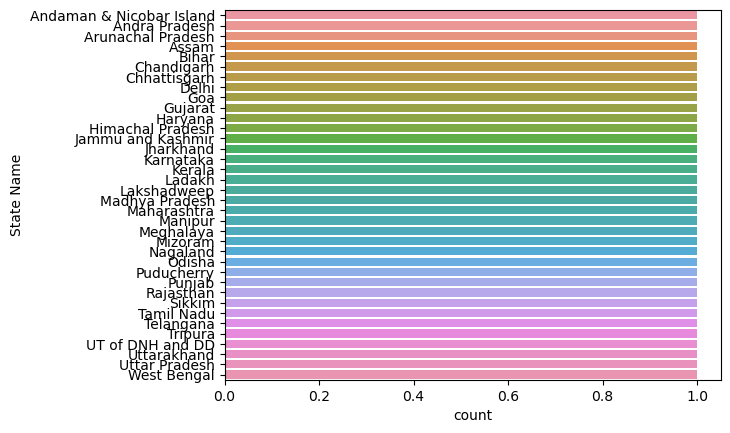

In [22]:
sns.countplot(y = 'State Name', data=ev_df)
plt.show()

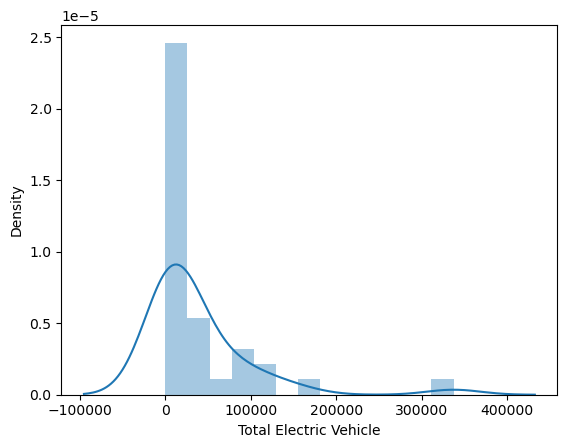

In [23]:
sns.distplot(ev_df['Total Electric Vehicle'])
plt.show()

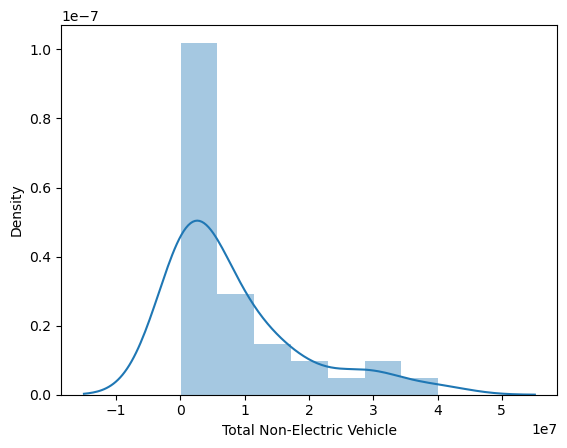

In [24]:
sns.distplot(ev_df['Total Non-Electric Vehicle'])
plt.show()

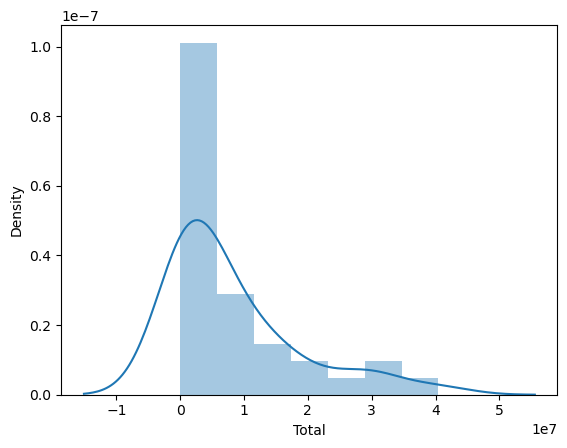

In [25]:
sns.distplot(ev_df['Total'])
plt.show()

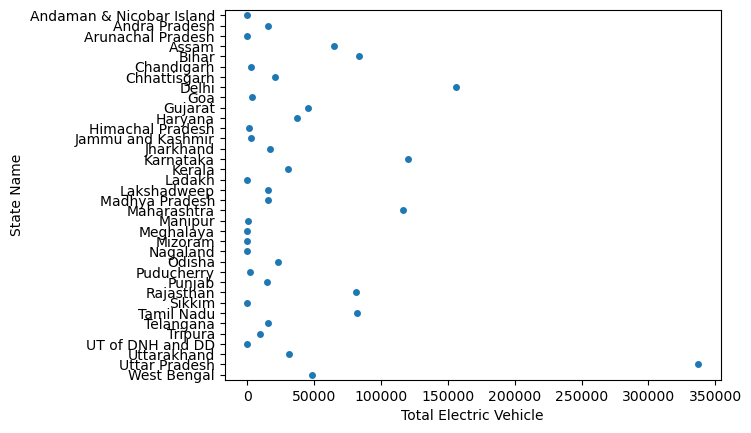

In [26]:
sns.swarmplot(x = 'Total Electric Vehicle', y='State Name', data=ev_df)
plt.show()

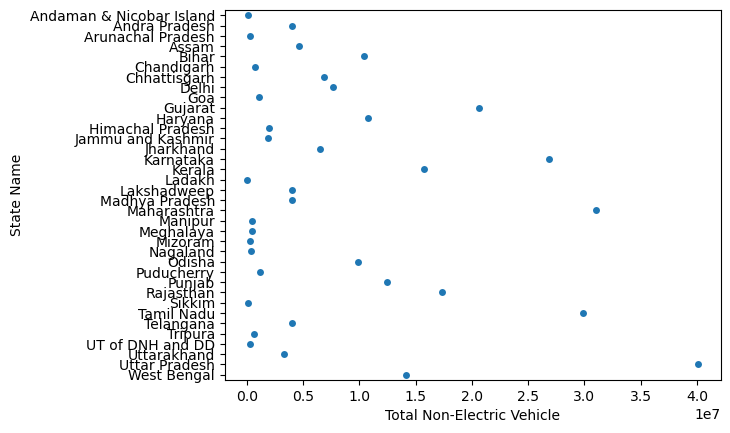

In [27]:
sns.swarmplot(x = 'Total Non-Electric Vehicle', y='State Name', data=ev_df)
plt.show()

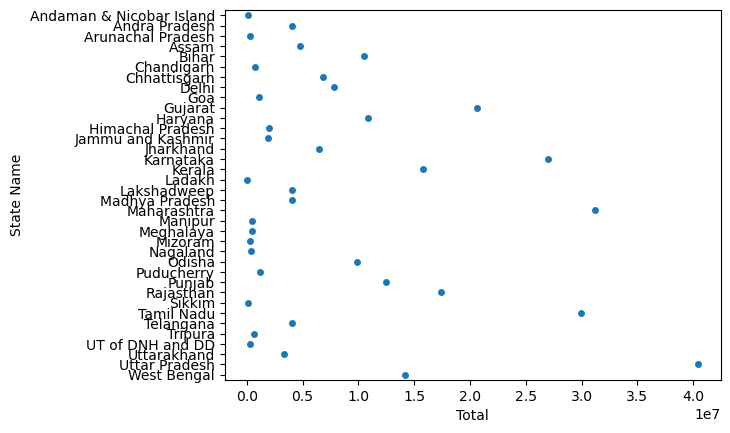

In [28]:
sns.swarmplot(x = 'Total', y='State Name', data=ev_df)
plt.show()

In [29]:
GROUP = ev_df.groupby('State Name')['Total'].apply(lambda x: x.mode()[0])
ev_df['GROUPBY_STATE_NAME'] = ev_df['State Name'].map(GROUP)

In [30]:
GROUP = ev_df.groupby(['Total Electric Vehicle'])['Total'].transform('median')
ev_df['GROUPBY_STATE_TOTAL_ele'] = GROUP

In [31]:
GROUP = ev_df.groupby(['State Name','Total Non-Electric Vehicle'])['Total'].transform('median')
ev_df['GROUPBY_STATE_TOTAL_non'] = GROUP

In [32]:
GROUP = ev_df.groupby(['State Name','Total Electric Vehicle','Total Non-Electric Vehicle'])['Total'].transform('mean')
ev_df['GROUPBY_STATE_TOTAL'] = GROUP

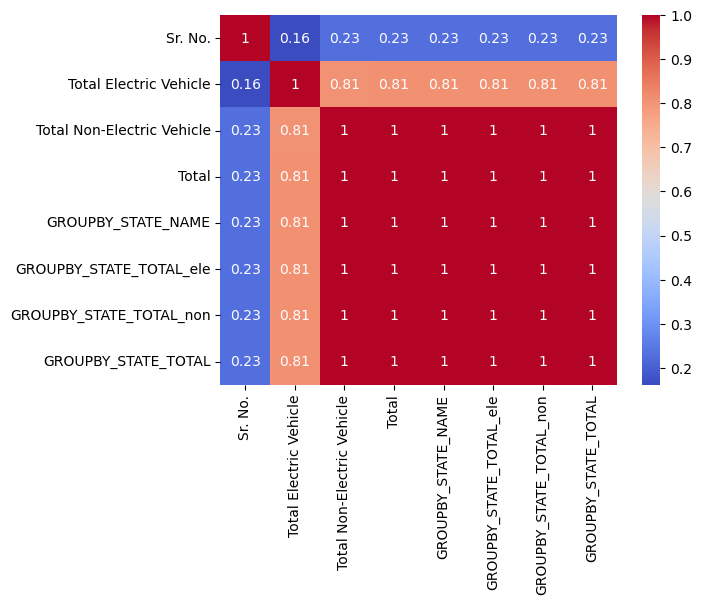

In [33]:
correlation_matrix = ev_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [34]:
X = ev_df.drop('Total',axis=1)
Y = ev_df.iloc[:,-1]

In [35]:
X.drop('Sr. No.', axis=1, inplace=True)

In [36]:
X.head()

,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,GROUPBY_STATE_NAME,GROUPBY_STATE_TOTAL_ele,GROUPBY_STATE_TOTAL_non,GROUPBY_STATE_TOTAL
0,Andaman & Nicobar Island,162.0,146945.0,147107.0,147107.0,147107.0,147107.0
1,Andra Pradesh,15807.5,3994547.0,4010354.5,4010354.5,4010354.5,4010354.5
2,Arunachal Pradesh,20.0,252965.0,252985.0,252985.0,252985.0,252985.0
3,Assam,64766.0,4677053.0,4741819.0,4741819.0,4741819.0,4741819.0
4,Bihar,83335.0,10407078.0,10490413.0,10490413.0,10490413.0,10490413.0


In [37]:
from sklearn.preprocessing import LabelEncoder
sc = LabelEncoder()
X['State Name'] = sc.fit_transform(X['State Name'])

In [38]:
X.head()

,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,GROUPBY_STATE_NAME,GROUPBY_STATE_TOTAL_ele,GROUPBY_STATE_TOTAL_non,GROUPBY_STATE_TOTAL
0,0,162.0,146945.0,147107.0,147107.0,147107.0,147107.0
1,1,15807.5,3994547.0,4010354.5,4010354.5,4010354.5,4010354.5
2,2,20.0,252965.0,252985.0,252985.0,252985.0,252985.0
3,3,64766.0,4677053.0,4741819.0,4741819.0,4741819.0,4741819.0
4,4,83335.0,10407078.0,10490413.0,10490413.0,10490413.0,10490413.0


In [39]:
from sklearn.model_selection import train_test_split  as split
X_train, X_test, Y_train, Y_test = split(X, Y, test_size =0.25, random_state=0)

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor()

In [42]:
Y_pred = model.predict(X_test)

In [43]:
score = r2_score(Y_test, Y_pred)
print("R2 SCORE : ",score)

R2 SCORE :  0.9980983249280833
